## Observations and Insights 
    The correlation between mouse weight and tumor volume was strong. which is to say that if you failed to control mouse weight as you were trying to determine efficacy of the drug then the results may be skewed.
    Going by the final tumor volume one could conclude that Capomulin and Ramicane appeared to be the most effective.The data observed only came back with one outlier from the drug Infubinol.
    The study had nearly an equal amount of Male and Female mice which could help to determine if sex correlated to the efficacy of certain drugs.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [2]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [3]:
# Method 2(optional): Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function. (https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)
drug_group_summary = combined_df.groupby('Drug Regimen').agg(\
        tumor_mean=('Tumor Volume (mm3)', np.mean),\
        tumor_median=('Tumor Volume (mm3)', np.median),\
        tumor_var=('Tumor Volume (mm3)', np.var),\
        tumor_std=('Tumor Volume (mm3)', np.std),\
        tumor_sem=('Tumor Volume (mm3)', st.sem)\
).round(3)

drug_group_summary

,tumor_mean,tumor_median,tumor_var,tumor_std,tumor_sem
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

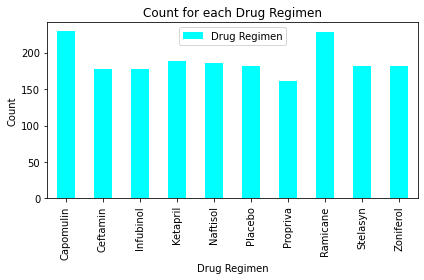

In [4]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 
drug_group = combined_df.groupby('Drug Regimen')

drug_group_count = pd.DataFrame(drug_group['Drug Regimen'].count())

count_chart = drug_group_count.plot(kind='bar', title="Count for each Drug Regimen", color="cyan")

count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Count")
plt.tight_layout()
plt.savefig("figures/PandasBar.png")

plt.show()

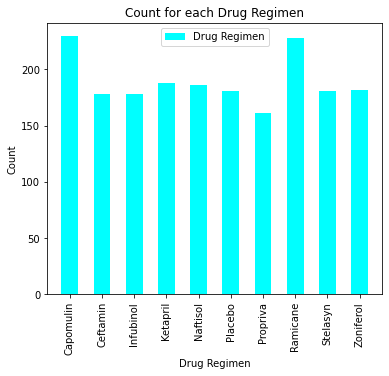

In [5]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.
x_axis = np.arange(len(drug_group_count))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(6,5))
plt.bar(x_axis, drug_group_count["Drug Regimen"], color='cyan', align="center", width = 0.52)
plt.xticks(tick_locations, list(drug_group_count.index), rotation="vertical")
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(drug_group_count["Drug Regimen"])*1.05)
plt.title("Count for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")
plt.savefig("figures/PyplotBar.png")

plt.show()
##  Note: this plot will be identical to the one that uses Pandas

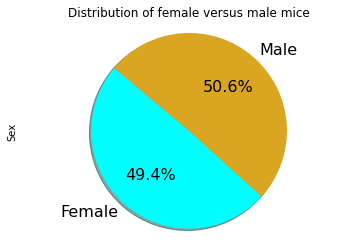

In [6]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice
sex_group = combined_df.groupby('Sex')

sex_group_count = pd.DataFrame(sex_group['Sex'].count())

sex_group_count.plot(kind='pie', y='Sex', \
                     title="Distribution of female versus male mice",startangle=140,\
                     autopct='%1.1f%%',shadow=True, fontsize=16, colors =["cyan","goldenrod"],legend =False)
plt.axis("equal")
plt.savefig("figures/PandaPie.png")
plt.show()
## Note: this plot will be identical to the one that uses Pyplot

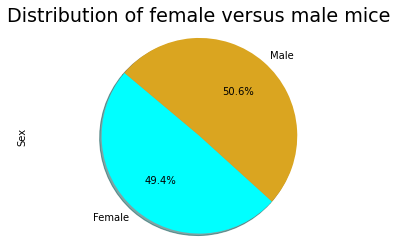

In [7]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice
sexes = list(sex_group_count.index.values)

sex_counts = sex_group_count['Sex']

colors = ["cyan", "goldenrod"]

plt.pie(sex_counts, labels=sexes, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 16
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.savefig("figures/PyplotPie.png")
plt.show()
##  Note: this plot will be identical to the one that uses Pandas

## Quartiles, Outliers and Boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_drugs = combined_df[combined_df['Drug Regimen'].isin(drug_list)]

four_tumor = four_drugs.groupby(['Drug Regimen','Mouse ID'])
four_last_tumor = four_tumor.agg(last_tumor=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)

four_last_tumor_unstack = four_last_tumor.stack(level=0).unstack(level=0)

four_last_tumor

last_tumor
Drug Regimen Mouse ID            
Capomulin    b128          38.983
             b742          38.940
             f966          30.486
             g288          37.074
             g316          40.159
...                           ...
Ramicane     s508          30.276
             u196          40.668
             w678          43.166
             y449          44.183
             z578          30.639

[100 rows x 1 columns]

In [9]:
counter = 0
    
for drug in drug_list:
    quartiles = four_last_tumor_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    

    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1
    

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.12 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.16 
Values below 36.83 for Infubinol could be outliers.


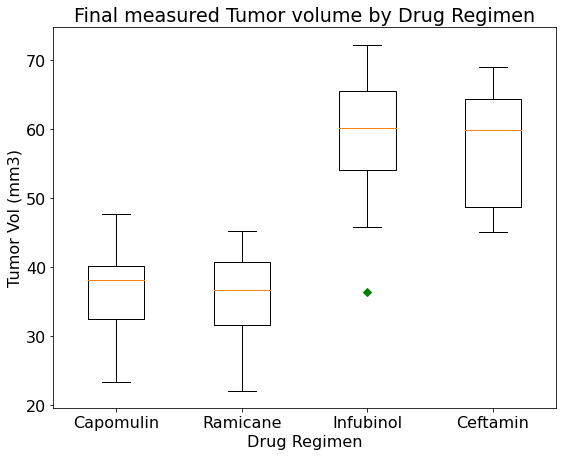

In [10]:
# Create empty list to fill with tumor vol data (for plotting)
boxplot_list = []

for drug in drug_list:
    boxplot_list.append(list(four_last_tumor_unstack[drug].dropna()))

fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(boxplot_list,notch=0,sym='gD')
plt.xticks([1,2,3,4],drug_list)

# Save the figure
plt.savefig("figures/BoxPlt.png")
plt.show()

## Line and Scatter Plots

In [11]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
capomulin_data = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']

# View the dataframe
capomulin_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


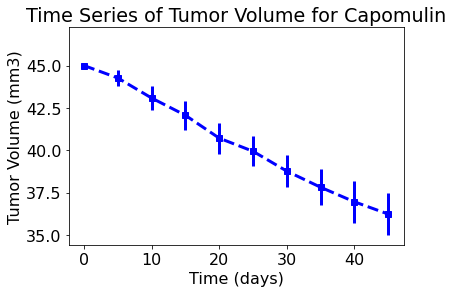

In [12]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
cap_time_tumor = capomulin_data.groupby(['Timepoint']).agg(\
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)\
).round(3)

cap_time_tumor.head(10)

time_series = list(cap_time_tumor.index.values)

plt.errorbar(
    time_series,
    cap_time_tumor['Tumor_Vol_Mean'],
    yerr = cap_time_tumor['Tumor_Vol_SEM'], 
    label = "Time Series of Tumor Volume for Capomulin",
    fmt = "bs--",
    linewidth = 3 
    )

plt.title("Time Series of Tumor Volume for Capomulin")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")


plt.xlim(min(time_series)-max(time_series)*0.05, max(time_series)*1.05)
plt.ylim(min(cap_time_tumor['Tumor_Vol_Mean'])*0.95, max(cap_time_tumor['Tumor_Vol_Mean'])*1.05)
plt.rcParams["figure.figsize"] = [8,7]

# Save the figure
plt.savefig("figures/LineChart.png")
plt.show()

In [13]:
cap_mouse_id = capomulin_data.groupby(['Mouse ID']).agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Mouse_weight=('Weight (g)', np.mean),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_vol_mean=('Tumor Volume (mm3)', np.mean)\
).round(3)
cap_mouse_id.head(10)

,Mouse_weight,Tumor_vol_mean
Mouse ID,,
b128,22,41.964
b742,21,40.084
f966,17,36.506
g288,19,41.990
g316,22,44.613
i557,24,44.806
i738,20,39.141
j119,23,44.465
j246,21,43.217


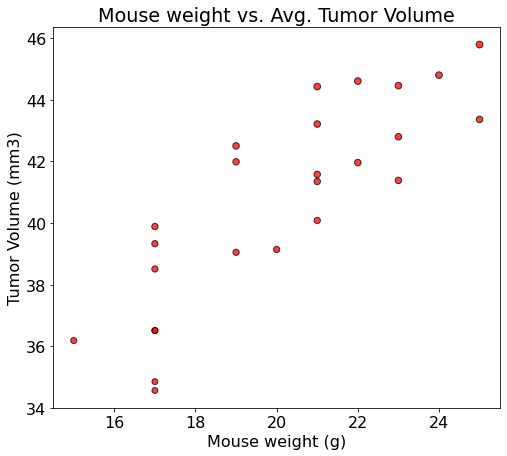

In [14]:
plt.scatter(
    cap_mouse_id['Mouse_weight'],
    cap_mouse_id['Tumor_vol_mean'],
    marker='o',
    facecolors='red',
    edgecolors='black',
    s=cap_mouse_id['Tumor_vol_mean'],
    alpha=.75)

# Create a title, x label, and y label for our chart
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
# Save the figure
plt.savefig("figures/ScatWtTumorVol.png")

plt.show()

## Correlation and Regression

In [15]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.
correlation = st.pearsonr(cap_mouse_id['Mouse_weight'],cap_mouse_id['Tumor_vol_mean'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


The r-squared is: 0.8419461020261081
The equation of the regression line is: y = 0.95x + 21.55


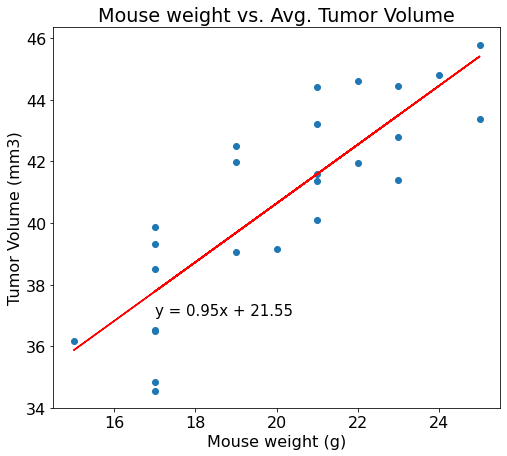

In [16]:
x_values = cap_mouse_id['Mouse_weight']
y_values = cap_mouse_id['Tumor_vol_mean']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

# Save the figure
plt.savefig("figures/ScatRegress.png")
plt.show()